In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

print(f"TensorFlow Version: {tf.__version__}")

TensorFlow Version: 2.19.0


In [2]:
# Carregar e preprocessar o dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape((-1, 28, 28, 1)) / 255.0
# -1 calcula a quantidade de amostras, no caso de imagens (provavalmente 60000)
# / 255 -> deixa as cores dos pixels normalizados (de 0 a 1)
x_test = x_test.reshape((-1, 28, 28, 1)) / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
# deixa cada resposta de cada imagem em one-hot encoded

In [3]:
# Criar o modelo com camadas convolucionais
model = keras.Sequential([
    # Primeira sequência de convolução
    Conv2D(8, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1), name="Conv1"),
    Conv2D(8, (3, 3), padding='same', activation='relu', name="Conv2"),
    MaxPooling2D(pool_size=(2, 2), name="Pool1"),

    # Segunda sequência de convolução
    Conv2D(16, (3, 3), padding='same', activation='relu', name="Conv3"),
    Conv2D(16, (3, 3), padding='same', activation='relu', name="Conv4"),
    MaxPooling2D(pool_size=(2, 2), name="Pool2"),

    # Camada de flatten e densas
    Flatten(name="Flatten"),
    Dense(40, activation='relu', name="Dense1"),
    Dense(10, activation='softmax', name="Output")
])

# Compilar o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\Nicolas\Downloads\tensorflow\.env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Treinar o modelo
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7868 - loss: 0.6410 - val_accuracy: 0.9718 - val_loss: 0.0950
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9720 - loss: 0.0902 - val_accuracy: 0.9806 - val_loss: 0.0625
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9824 - loss: 0.0540 - val_accuracy: 0.9860 - val_loss: 0.0480
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9870 - loss: 0.0429 - val_accuracy: 0.9822 - val_loss: 0.0559
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9890 - loss: 0.0344 - val_accuracy: 0.9865 - val_loss: 0.0456


In [5]:
# Avaliar no conjunto de teste
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9855 - loss: 0.0460
Test Accuracy: 0.99


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


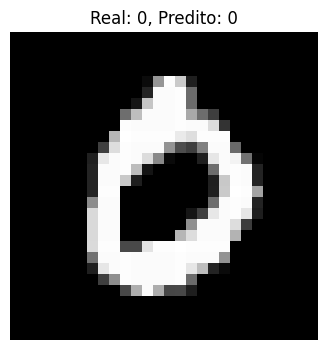

In [6]:
_ = model(np.zeros((1, 28, 28, 1)))
# np.zeros -> cria um array cheio de zeros, ou seja, passa as dimensões e cria uma imagem toda preta 
# model -> o modelo feito (no caso CNN)
# _ = -> serve para não atribuir em nenhuma variável e printar a imagem (toda preta)

saidas_seq = [layer.output for layer in model.layers]
# model.layers -> todas as camadas do modelo
# layer.output -> saída de cada camada
# layer -> variável de iteração
# saidas_seq -> cada cada camada do modelo (modelo.layers) pegue a saída (layer.output) e coloque em saidas_seq, cada camada transforma o formato dos dados
# cada elemento da lista é um tensor que representa a saída de cada camada, o tensor é um objeto que representa um array multidimensional
visualizacao_model = tf.keras.models.Model(inputs=model.inputs, outputs=saidas_seq)
# tf.keras.models.Model -> cria um novo modelo, o modelo recebe um input e retorna uma lista mostrando como ficou o input após cada camada
# inputs=model.inputs -> tensor simbólico que representa o formato da entrada que o modelo espera
# outputs=saidas_seq -> faz o modelo retornar as saídas de todas as camadas do seu modelo original, não apenas a saída final

# Selecionar uma imagem de teste
indice_img_teste = 3
img_teste = x_test[indice_img_teste:indice_img_teste + 1]
# img_teste -> retorna apenas uma imagem no formato 4D
# usar img_test[3] por exemplo retorna uma imagem no formato 3D e fazendo [3:4] retorna no formato 4D, isso acontece pela forma que o numpy funciona
# com indexing (indexação) e slicing (fatiamento)

mapas_sequenciais = visualizacao_model.predict(img_teste)
# retorna a saída de cada camada do modelo, usando img_teste como input

predicao = model.predict(img_teste)
# mostra o resultado (saída) do modelo original (CNN)
label_real = np.argmax(y_test[indice_img_teste])
# y_test está em one-hot encoded, e neste caso, ao usar indeice_img_teste (3) está se referindo sobre a imagem 3 que foi usada em 'predicao'
label_predito = np.argmax(predicao[0]) 
# retorna a resposta correta da imagem 3 (imagem que o modelo original previu), usa o [0] porque o retorno de np.argmax é um array 

# Visualizar a imagem original com os rótulos
plt.figure(figsize=(4, 4))
plt.title(f"Real: {label_real}, Predito: {label_predito}")
plt.imshow(img_teste[0].squeeze(), cmap='gray')
# img_teste armazena somente a imagem (1, 28, 28, 1) que foi usada como exemplo e usou o [0] para selecionar a imagem
# squeeze -> remove a dimensão 1, ou seja, transforma (1, 28, 28, 1) em (28, 28)
plt.axis('off')
plt.show()

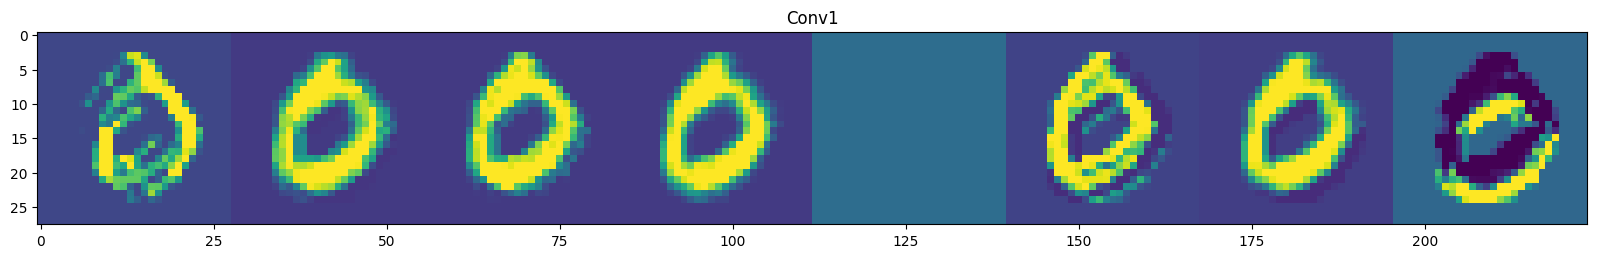

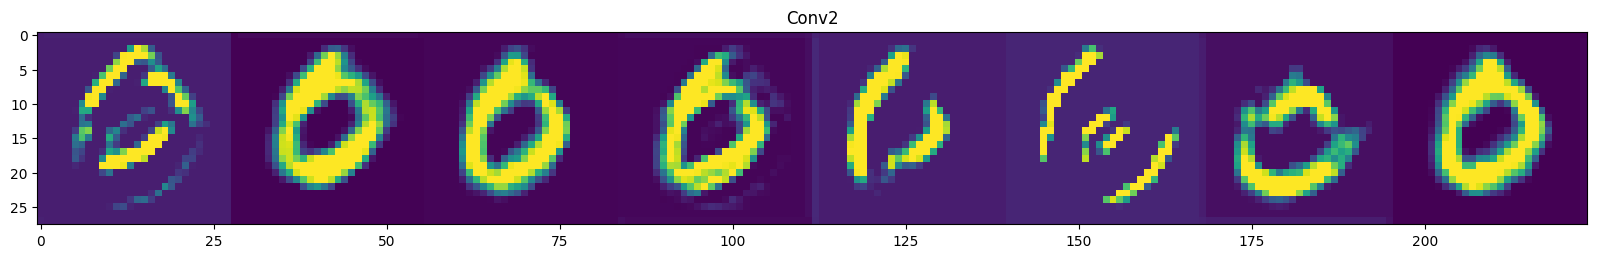

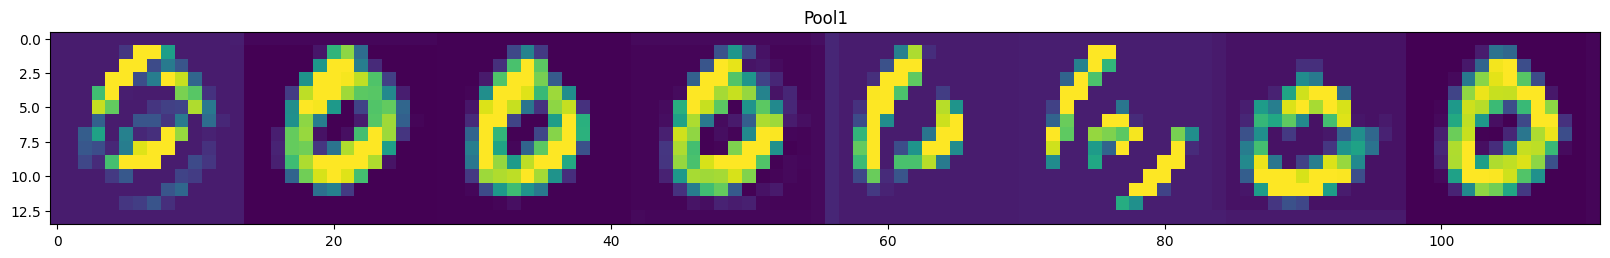

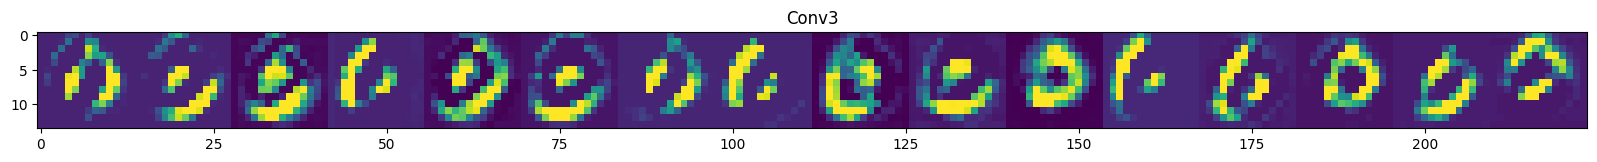

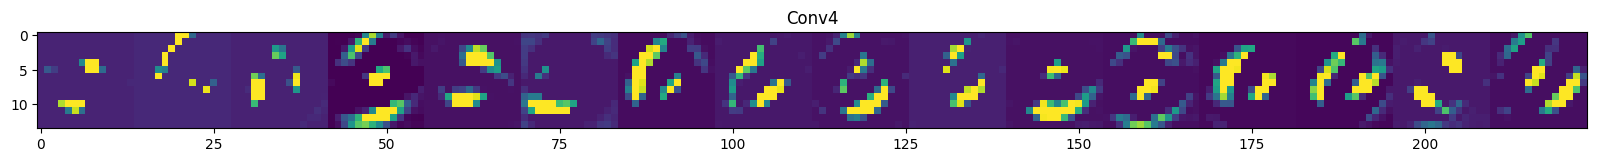

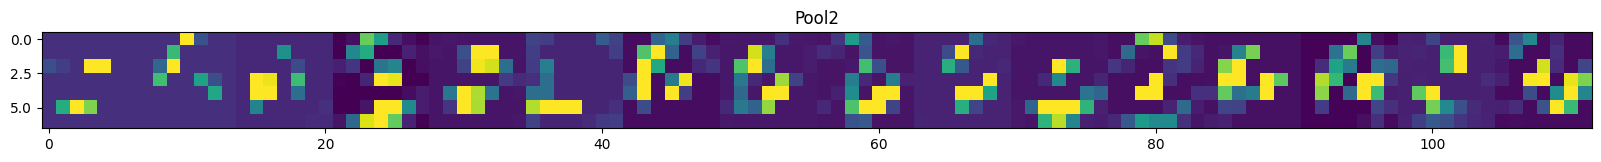

In [7]:
layer_nomes = [layer.name for layer in model.layers]
# a rede neural criada teve o parâmetro 'name' e a lista 'layer_nomes' retorna esses nomes

# Visualizar os mapas de ativação
for layer_name, feature_map in zip(layer_nomes, mapas_sequenciais):
    if len(feature_map.shape) == 4:  # Verificar se é uma camada convolucional
        n_features = feature_map.shape[-1]
        size = feature_map.shape[1]
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= (x.std() + 1e-5)  # Evitar divisão por zero
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')

            # Preencher o grid horizontal
            display_grid[:, i * size: (i + 1) * size] = x

        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
# zip ->  recebe listas e junta os elementos de mesmo índice em uma tupla em uma nova lista
# layer_nomes (layer_name) -> retorna o nome das camadas
# mapas_sequenciais (feature_map) -> retorna a saída de cada camada do modelo
# no for, cada elemento é uma tupla que contém o nome da camada e o input após passar por essa camada
# len(feature_map.shape) == 4 -> verifica se a saída de cada camada está no formato 4D (batch_size, altura, largura, canais), ou seja, somente Conv2D 
# MaxPooling2D ficam com o formato 4D
# que é o formato do input inicial em cnn, porém o input pode mudar de formato de acordo passa com as camadas
# feature_map.shape[-1] -> pega o último elemento (batch_size, altura, largura, canais), no caso canais que normalmente começa com 1 (preto e branco) ou 3
# (colorido), porém conforme o input vai passando pelas camadas, o número de canais pode aumentar, o primeiro argumento de Conv2D (Conv2D(8, ...)) define o 
# número de canais
# feature_map.shape[1] -> pega a altura que é o mesmo valor da largura, porém algumas camadas podem alterar o tamanho da imagem, como MaxPooling2D(pool_size=(2, 2))
# que diminui o tamanho da imagem pela metade 
# np.zeros((size, size * n_features)) -> faz um array no formato 2D (altura, largura * canais), lembrando que o número de canais e a altura/largura
# podem mudar conforme passam pelas camadas, isso vai servir para mostrar a imagem com cada canal (se for 8, a imagem com 0 a 7)
# dentro do segundo for: 
    # for i in range(n_features) -> vai repetir pela quantidade de canais (isso para cada camada que tem shape 4, o n_features mais comuns são 1, 8, 16, 32)
    # e feature_map é a saída da camada (que no caso vai ser somente das camadas Conv2D e Maxpooling for serem 4D) 
    # feature_map[0, :, :, i] -> um exemplo de feature_map seria 4D (1, 14, 14, 6), [0] é para o batch_size, [:, :] é para altura e largura e [i] seria para os canais
    # com isso, [:] mantém os valores no array (altura e largura) e ao usar um valor, está iterando pelos elementos da dimensão (batch_size, altura, largura e canais são 
    # dimensões numpy) e os remove do array, então o [i] no final do loop vai ter iterando por todos os canais e retido eles (porque n_features é a quantidade de canais ), 
    # ficando somente um array 2D (altura, largura)
    # x -= x.mean() -> a imagem possui os pixels normalizados (cores de 0 a 1), então o x.mean() retorna a média dos 784 pixels e depois subtrai cada valor do pixel com a 
    # média (-=)
    # x /= (x.std() + 1e-5) -> evita que os valores muitos altos ou baixos causem problemas
    # (x *= 64) e (x += 128) -> ajusta os valores para que fiquem entre 0 e 255
    # x = np.clip(x, 0, 255).astype('uint8') -> limita os valores entre 0 e 255 e converte os valores para uint8 (inteiro sem sinal de 8 bits) 
    # tudo isso é feito para conseguir visualizar melhor como o modeo está identificando os padrões das imagens
# visualização da imagem:
    # display_grid[:, i * size: (i + 1) * size] = x -> display_grid é o tamanho necessário (inicialmente vazio) para mostrar as imagens, como ele está dentro do for e itera 
    # por cada canal, vai mostrar a imagem para cada canal por isso tem a largura de size * n_features
    # [:] -> como display_grid é 2D, o [:] significa que está selecionando toda a altura (todas as linhas)
    # i * size: (i + 1) * size -> as camadas Conv2D e Maxpooling2D são as únicas que entram no for nesse modelo por terem o formato 4D, e cada uma delas tem a sua quantidade 
    # canais (8 ou 16) e a imagem se transforma pela quantidade de canais para depois ir para a próxima camada, então o display_grid vai printar a imagem pela quantidade de 
    # canais para cada camada. ':' define aonde cada imagem vai começar e terminar e 'size' é a largura da imagem, então a imagem vai começar em (largura * número de canais) e
    # terminar em (largura * número de canais + 1) em display_grid
    # scale = 20. / n_features -> para ajustar o tamanho das imagens no display_grid

In [8]:
# Imprimir a arquitetura do modelo e o número de parâmetros
print("Arquitetura do modelo:")
model.summary()

Arquitetura do modelo:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                  │ (None, 28, 28, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2 (Conv2D)                  │ (None, 28, 28, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool1 (MaxPooling2D)            │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv3 (Conv2D)                  │ (None, 14, 14, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv4 (Conv2D)                  │ (None, 14, 14, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool2 (MaxPooling2D)            │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 40)             │        31,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │           410 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 107,888 (421.44 KB)

 Trainable params: 35,962 (140.48 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 71,926 (280.96 KB)

In [9]:
primeira_camada = model.get_layer("Conv1")
# get_layer -> retorna a camada com o nome "Conv1", que foi definido em 'name' na criação da rede neural 
# Conv2D(8, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1), name="Conv1")

kernels, biases = primeira_camada.get_weights()
# get_weights() -> retorna o peso e o viés da primeira camada

# Os kernels têm a forma (tamanho do filtro, tamanho do filtro, canais de entrada, número de filtros)
print(f"Forma dos filtros: {kernels.shape}")
# kernels seriam os pesos e ele são os valores numéricos dentro do filtro, o filtro é um bloco (3x3) que vai passar por toda
# a imagem para identificar padrões, e esse filtro vai repetir 8 vezes 
# kernels.shape -> (3, 3) é o tamanho do filtro, (1) número de canais, no caso preto e branco e (8) número de filtros que 
# vão passar pela imagem

print(f"\nFiltro {0}:")
print(kernels[:, :, :, 0]) 

Forma dos filtros: (3, 3, 1, 8)

Filtro 0:
[[[ 0.27735245]
  [-0.08033816]
  [-0.38903585]]

 [[ 0.39642873]
  [-0.03854573]
  [-0.2525064 ]]

 [[-0.12987417]
  [ 0.31863645]
  [ 0.19785307]]]


In [10]:
# Salvar o modelo no formato HDF5
model.save('modelo_mnist.h5')